# 1. Introduction
### Overview 

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

#### Part 1: Decision trees:
    * For this section, you should build a model that makes the above prediction. You should not use individual decision trees, rather you should use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.
    * Try and optimize each of the models, making sure to document how you've set up your hyperparameters.
    * Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction
    * Note that with decision trees, you don't need to do a lot of data cleaning. This will be very different with SVM.

#### Part 2: SVM:
    * In this section, you may be required to clean the data a little bit so as to make sense of the features.
    * Document what transformation you've done on the data.
    * Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.

Hint: You may want to use decision trees to give you the most preferable features you can use. but also keep in mind that those features might not be suitable for SVM. It might be a good idea to graph them first.

-  After getting your best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features. Compare the model you've just created with the 2-features version. 

### 1.1 Research Question
The research question is to use the given variables to predict whether or not a patient has hypothyroid.

### 1.2 Metric for Success
Our models will be considered a success when they are able to correctly predict the patient's status with at least 80% accuracy.

### 1.3 Context
The context of this data set is in a medical domain. As a data scientist approached by Nairobi Hospital, my job is to look at the different features provided and use them to determine whether or not a patient has hypothyroid.

### 1.4 Experimental design
1. Data cleaning & preparation
        a) loading libraries and data set
        b) remove missing values & duplicates
        c) remove and/or rename columns where necessary
        d) change data type where necessary
2. Exploratory Data Analysis
        a) univariate analysis
        b) bivariate analysis
3. Modeling
        a) Decision Trees
            - Carry out feature engineering & selection
            - Split data into train & test sets
            - Use random forest, Ada Boost, and/or Gradient Boost
            - Visualize the decision trees created
            - Optimize the models
            - Select the model you trust most (random forest, ada boosted forest, gradient boosted forest) & identify the most impactful features
        b) Support Vector Machines
            - Clean data & document
            - Apply polynomial, linear, & rbf kernels
            - Evaluate kernel performance & select best-performancing kernel
            - Use tuned hyperparameters on best kernel to make predictions
4. Conclusion


### 1.5 Appropriateness of the Data
After going through the data set, I can confidently say that it is not appropriate for effectively answering the research question. For starters, it has way more observations of those whose status is negative than those who actually have hypothyroid. It also has way more female patients than males, and most of the patients are within the 40-60 age range. Furthermore, there was a lot of missing data which had to be imputed, meaning that the new and cleaned data set might not have accurately reflected reality. So this data set is very highly biased and not appropriate.

# 2. Data Preparation & Cleaning

In [1]:
# importing basic libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

# to preview all columns
pd.set_option("display.max.columns", None)

In [2]:
# loading & previewing data set
hypo = pd.read_csv('hypothyroid.csv')
hypo.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [3]:
# previewing basic info
hypo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
status                       3163 non-null object
age                          3163 non-null object
sex                          3163 non-null object
on_thyroxine                 3163 non-null object
query_on_thyroxine           3163 non-null object
on_antithyroid_medication    3163 non-null object
thyroid_surgery              3163 non-null object
query_hypothyroid            3163 non-null object
query_hyperthyroid           3163 non-null object
pregnant                     3163 non-null object
sick                         3163 non-null object
tumor                        3163 non-null object
lithium                      3163 non-null object
goitre                       3163 non-null object
TSH_measured                 3163 non-null object
TSH                          3163 non-null object
T3_measured                  3163 non-null object
T3                           3163 non-null 

Our data set has 3,163 rows and 26 columns. On closer inspection, we see that all our columns are categorical in nature. This lack of variability in data types is suspicious especially when we can see from the data set's preview that variables like 'age', 'T3', 'TSH', and so on should be numerical.

In [4]:
# dropping duplicates, if any
hypo = hypo.drop_duplicates()
hypo.shape

(3086, 26)

After carrying out the function to drop duplicates, we are now left with 3,086 records, which is not a concerning amount of data loss.

In [5]:
# checking for missing values
hypo.isna().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

At first glance, there does not seem to be any missing values. Maybe the missing values have been replaced with a special character or a word or number that will make it stand out.

In [6]:
# previewing the unique values of each of our columns

my_cols = hypo.columns.to_list()

for column in my_cols:
    print("\n")
    print("Column Name:", column)
    print(hypo[column].unique())



Column Name: status
['hypothyroid' 'negative']


Column Name: age
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']


Column Name: sex
['M' 'F' '?']


Column Name: on_thyroxine
['f' 't']


Column Name: query_on_thyroxine
['f' 't']


Column Name: on_antithyroid_medication
['f' 't']


Column Name: thyroid_surgery
['f' 't']


Column Name: query_hypothyroid
['f' 't']


Column Name: query_hyperthyroid
['f' 't']


Column Name: pregnant
['f' 't']


Column Name: sick
['f' 't']


Column Name: tumor
['f' 't']


Column Name: lithium
['f' 't']


Column Name: goitre
['f' 't']


Column Name

As expected, we have found '?' in some of the columns like 'age', 'sex', 'TSH', and the rest of the columns that are supposed to be numerical.

In [7]:
# turning the values with '?' null to make things easier
questions = ['age', 'sex', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

for question in questions:
    hypo[question] = hypo[question].replace('?', np.nan)

In [8]:
# previewing the distribution of our missing values
hypo.isna().sum()

status                          0
age                           438
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           455
T3_measured                     0
T3                            680
TT4_measured                    0
TT4                           240
T4U_measured                    0
T4U                           239
FTI_measured                    0
FTI                           238
TBG_measured                    0
TBG                          2835
dtype: int64

As we can see, we actually have a lot of missing values in our data set. Removing all of them is not an option since we would be left with almost nothing to work with. So we will use imputation to replace the missing values with either the mean or mode of their respective columns.

In [9]:
# converting the relevant columns into their necessary datatypes to make it 
# easier to work with them
floats = np.array(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG'])

for item in floats:
    hypo = hypo.astype({item : 'float64'})
    print(item, ":", hypo[item].dtypes)

age : float64
TSH : float64
T3 : float64
TT4 : float64
T4U : float64
FTI : float64
TBG : float64


In [10]:
# confirming that the data types have been changed
hypo.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                          float64
dtype: object

In [11]:
# replacing the missing values in the test results with the means of their columns
tests = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

for test in tests:
    hypo[test] = hypo[test].fillna(hypo[test].mean())
    
# confirming that there are no null values in those columns
hypo.isna().sum()

status                        0
age                           0
sex                          73
on_thyroxine                  0
query_on_thyroxine            0
on_antithyroid_medication     0
thyroid_surgery               0
query_hypothyroid             0
query_hyperthyroid            0
pregnant                      0
sick                          0
tumor                         0
lithium                       0
goitre                        0
TSH_measured                  0
TSH                           0
T3_measured                   0
T3                            0
TT4_measured                  0
TT4                           0
T4U_measured                  0
T4U                           0
FTI_measured                  0
FTI                           0
TBG_measured                  0
TBG                           0
dtype: int64

In [12]:
# replacing the missing values in the 'sex' column with its mode
hypo['sex'] = hypo['sex'].fillna(hypo['sex'].mode()[0])

# confirming that there are no null values in our column
hypo.sex.unique()

array(['M', 'F'], dtype=object)

# 3. Exploratory Data Analysis

### 3.1 Generic EDA

This is done to get a basic understanding of our dataset as a whole.

In [13]:
# get summary statistics
hypo.describe(include = 'all')

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3086,3086.000000,3086,3086,3086,3086,3086,3086,3086,3086,3086,3086,3086,3086,3086,3086.000000,3086,3086.000000,3086,3086.000000,3086,3086.000000,3086,3086.000000,3086,3086.000000
unique,2,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN
top,negative,NaN,F,f,f,f,f,f,f,f,f,f,f,f,y,NaN,y,NaN,y,NaN,y,NaN,y,NaN,n,NaN
freq,2945,NaN,2192,2640,3031,3044,2983,2851,2851,3025,2989,3046,3084,2990,2631,NaN,2406,NaN,2846,NaN,2847,NaN,2848,NaN,2835,NaN
mean,NaN,51.112538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.809320,NaN,1.933666,NaN,108.706922,NaN,0.977559,NaN,115.489080,NaN,31.070120
std,NaN,17.854431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.180994,NaN,0.864826,NaN,42.836471,NaN,0.216873,NaN,57.780967,NaN,5.528848
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,2.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
25%,NaN,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,1.500000,NaN,85.000000,NaN,0.860000,NaN,92.000000,NaN,31.070120
50%,NaN,51.112538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.933666,NaN,107.000000,NaN,0.977559,NaN,110.000000,NaN,31.070120
75%,NaN,64.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.809320,NaN,2.200000,NaN,124.000000,NaN,1.050000,NaN,126.000000,NaN,31.070120


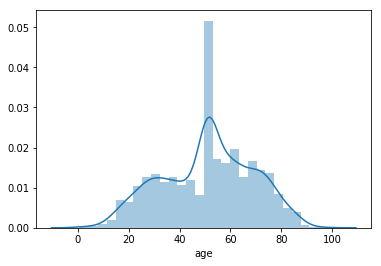

In [14]:
# looking at distribution of age 
sb.distplot(hypo.age)

The 'age' variable appears to be a normal distribution, peaking at arounf 50-52.

In [15]:
print("Mean age:", hypo.age.mean())
print("Median age:", hypo.age.median())
print("Modal age:", hypo.age.mode())

Mean age: 51.11253776435048
Median age: 51.112537764350456
Modal age: 0    51.112538
dtype: float64


The mean, median, and mode are all the same (51). This is unusual but understandable because we have imputed the null values with the mean age.

In [16]:
# calculating age range
min_age = hypo.age.min()
max_age = hypo.age.max()
range_age = max_age - min_age
print("The youngest age is {}, the oldest age is {}.".format(min_age, max_age))
print("Therefore there's a range of {}".format(range_age))

The youngest age is 1.0, the oldest age is 98.0.
Therefore there's a range of 97.0


In [17]:
# splitting age into 9 age groups using the following ranges:
# 0-9, 10-18, 19-27, 28-36, 37-54, 55-63, 64-72, 73-81 and 82-99

conditions = [
    ((hypo.age >= 0) & (hypo.age <= 9)),
    ((hypo.age >= 10) & (hypo.age <= 18)),
    ((hypo.age >= 19) & (hypo.age <= 27)),
    ((hypo.age >= 28) & (hypo.age <= 36)),
    ((hypo.age >= 37) & (hypo.age <= 54)),
    ((hypo.age >= 55) & (hypo.age <= 63)),
    ((hypo.age >= 64) & (hypo.age <= 72)),
    ((hypo.age >= 73) & (hypo.age <= 81)),
    ((hypo.age >= 82) & (hypo.age <= 99))
]
choices = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

hypo['age_range'] = np.select(conditions, choices)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7faccb5cf3c8>],
      dtype=object)

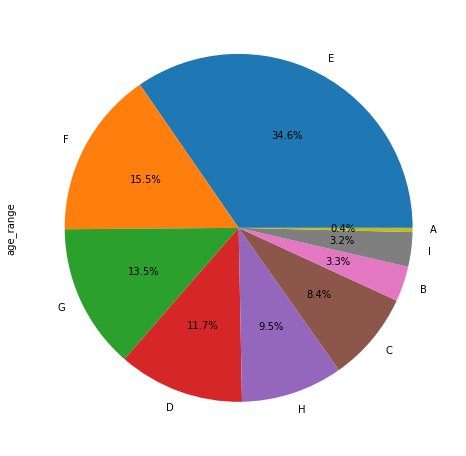

In [18]:
# plotting the age ranges in a pie chart
hypo.age_range.value_counts().plot(kind = 'pie', autopct = '%0.1f%%',
                                       figsize = [10, 8], subplots = True)

We can see that majority of the respondents are in Group E, which is between 37 and 54. The age range with the fewest patients is Group A (0-9 years).

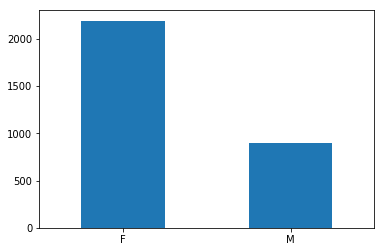

In [19]:
# previewing our data set's gender distribution
hypo.sex.value_counts().plot(kind = 'bar', rot = 0)

Our data set is very biased because we can see that females outnumber males by more than twice.

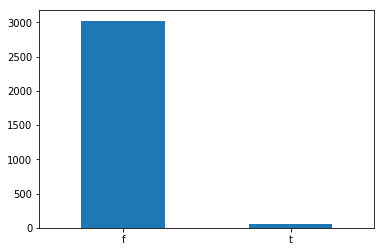

In [20]:
# distribution of pregnancy
hypo.pregnant.value_counts().plot(kind = 'bar', rot = 0)

Majority of the respondents are not pregnant. Very few are, which makes it hard to accurately investigate whether there is a link between pregnancy and hypothyroidism. Also, we have to confirm that those marked pregnant are not male, otherwise that would be a wrong/invalid record.

In [21]:
hypo.groupby('pregnant').sex.value_counts()

pregnant  sex
f         F      2131
          M       894
t         F        61
Name: sex, dtype: int64

As expected, there are no pregnant males which makes valid sense. Of the 2,131 females remaining in the data set, only 61 are pregnant, which is not sufficient to explore the relationship between pregnancy and hypothyroidism, if such a relationship exists.

In [22]:
# creating lists containing the column names stored in their respective lists
# to make iterating through the data set easier
tests_measured = ['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 
                  'FTI_measured', 'TBG_measured']

categorical = ['on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication',
               'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid']

others = ['pregnant', 'sick', 'tumor', 'lithium', 'goitre']

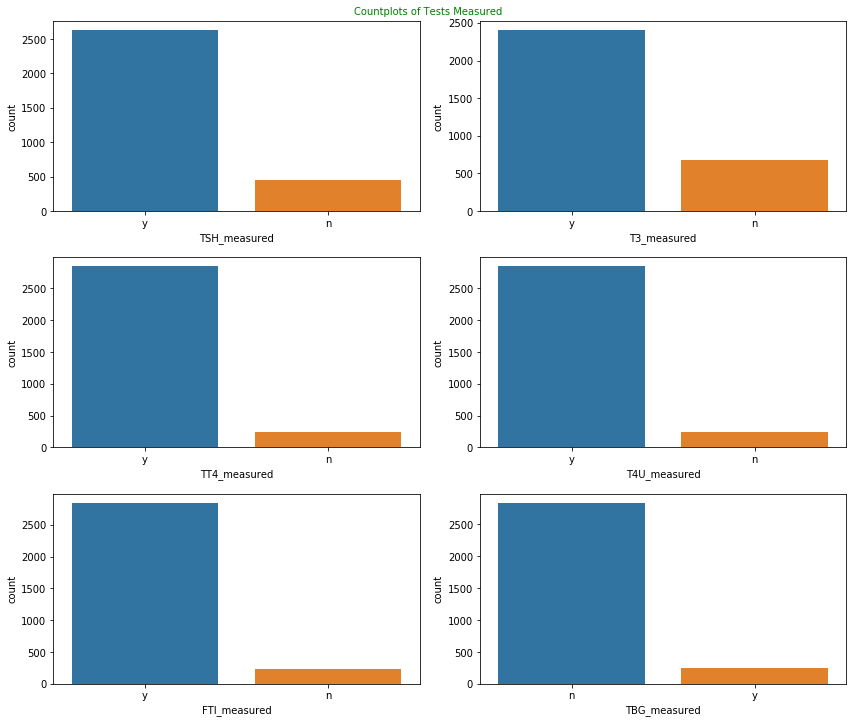

In [23]:
# plotting the distribution of the tests taken
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (12, 10))
plt.suptitle('Countplots of Tests Measured', fontsize = 10, y = 1.0, 
             color = 'green')

for ax, data, column in zip(axes.flatten(), hypo, tests_measured):
    sb.countplot(hypo[column], ax = ax)
    
plt.tight_layout()

TSH, T3, TT4, T4U, and FTI show more 'yes' results than 'no' results to their respective tests.
The test for TBG is the opposite which means that there might be something unusual about that test.

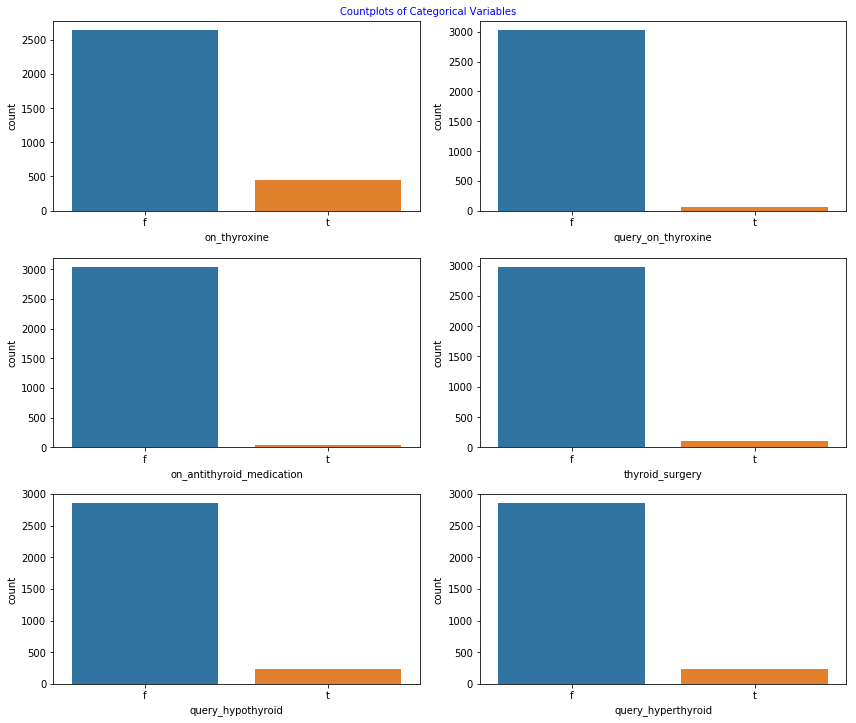

In [24]:
# plotting the distribution of medication & surgery
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (12, 10))
plt.suptitle('Countplots of Categorical Variables', fontsize = 10, y = 1.0,
             color = 'blue')

for ax, data, column in zip(axes.flatten(), hypo, categorical):
    sb.countplot(hypo[column], ax = ax)
    
plt.tight_layout()

We see that majority of the patients haven't gone for medication or surgery  related to hypothyroidism so this goes on to further prove the inapporpriatenness of this data set in answering the research question. 

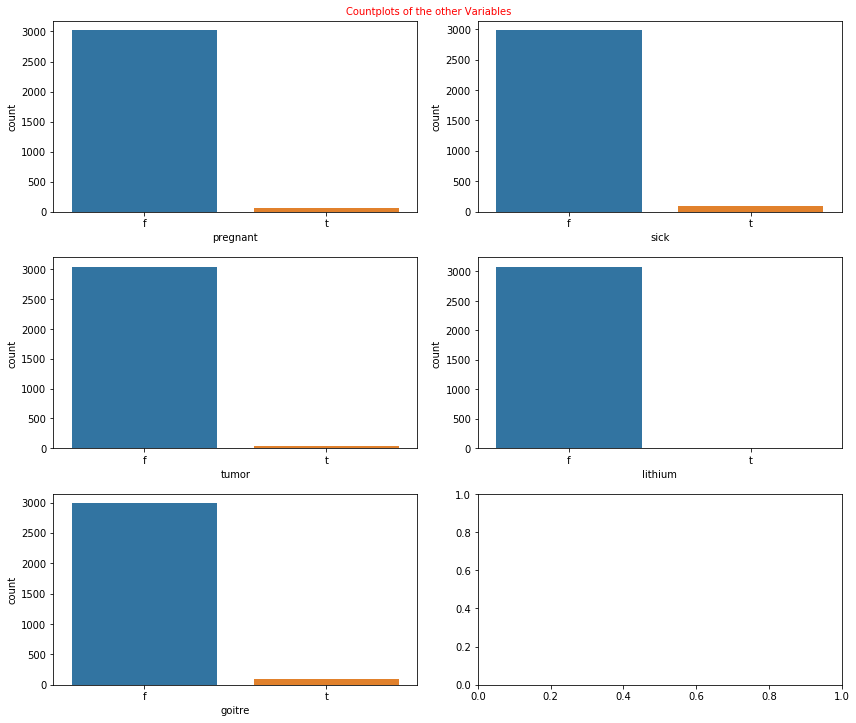

In [25]:
# plotting the distribution of the rest of the variables
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (12, 10))
plt.suptitle('Countplots of the other Variables', fontsize = 10, y = 1.0,
             color = 'red')

for ax, data, column in zip(axes.flatten(), hypo, others):
    sb.countplot(hypo[column], ax = ax)
    
plt.tight_layout()

We can see that majority aren't pregnant or sick, and they don't have tumors, lithium, or goitres. As with the other variables, this data is biased and not appropriate enough to make an accurate and realistic analysis/prediction.

### 3.2 Research-specific EDA

Since our research question is to focus on the factors that influence whether or not a person has hypothyroidism, we will now make the 'status' column our main focus during exploratory data analysis.

negative       2945
hypothyroid     141
Name: status, dtype: int64


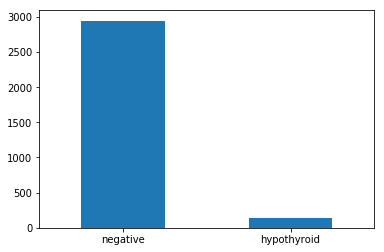

In [26]:
# distribution of hypothyroidism status
hypo.status.value_counts().plot(kind = 'bar', rot = 0)
print(hypo.status.value_counts())

It appears that most of the observations have reported 'negative'. Those without hypothyroidism outnumber those with it 2945 to 141 which makes this dataset very biased and also not appropriate enough to effectively and realistically answer the research question.

[Text(0, 0.5, 'Status'), Text(0.5, 1.0, 'Hypothyroidism per Age Range')]

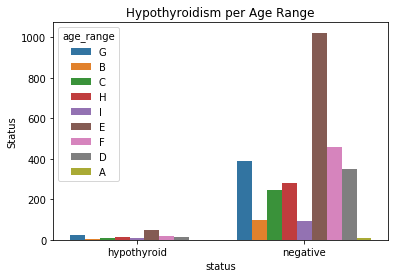

In [27]:
# previewing the distribution of hypothyroidism across the age ranges
hypo_age = sb.countplot('status', hue = 'age_range', data = hypo)
hypo_age.set(title = "Hypothyroidism per Age Range", ylabel = "Status")

We can see that the records for those with hypothyroid are very, very low compared to those who are negative. In both cases, Group E (ages 37-54) made up the vast majority while group A (0-9 years) made up the minority.

In [28]:
# hypothyroidism per pregnancy status
hypo.groupby('status').pregnant.value_counts()

status       pregnant
hypothyroid  f            140
             t              1
negative     f           2885
             t             60
Name: pregnant, dtype: int64

Of the 61 pregnant women in our dataset, only 1 had hypothyroidism. Not only is this not generalizable, it is also too biased in determining whether pregnancy is a factor influencing hypothyroidism.

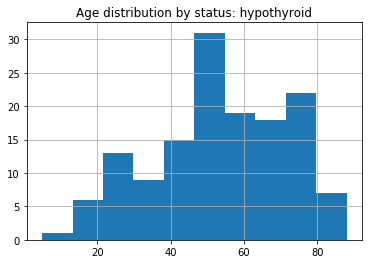

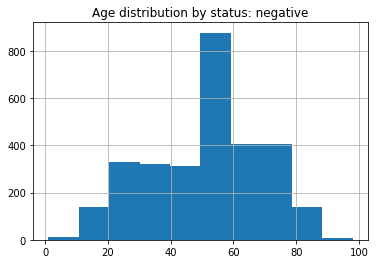

In [29]:
# status distribution across age
status = list(hypo.status.unique())
for stat in status:
    hypo.loc[hypo.status == stat].age.hist()
    plt.title("Age distribution by status: {}".format(stat))
    plt.show()

Both appear to have normap distributions and their most frequently occuring values seem to be somewhere between 45 and 58.

In [30]:
# display the distribution of these based on status

hypo_cat = tests_measured + categorical + others

for cat in hypo_cat:
    print(hypo.groupby('status')[cat].value_counts())
    print("\n")

status       TSH_measured
hypothyroid  y                140
             n                  1
negative     y               2491
             n                454
Name: TSH_measured, dtype: int64


status       T3_measured
hypothyroid  y               128
             n                13
negative     y              2278
             n               667
Name: T3_measured, dtype: int64


status       TT4_measured
hypothyroid  y                141
negative     y               2705
             n                240
Name: TT4_measured, dtype: int64


status       T4U_measured
hypothyroid  y                141
negative     y               2706
             n                239
Name: T4U_measured, dtype: int64


status       FTI_measured
hypothyroid  y                141
negative     y               2707
             n                238
Name: FTI_measured, dtype: int64


status       TBG_measured
hypothyroid  n                138
             y                  3
negative     n               

To summarize the above results:
    * most of the patients are female
    * most of the patients' status is negative
    * majority of the respondents are between 37-54 years of age
    * most of the patients had carried out the necessary tests, e.g. TSH, T3, TT4, T4U, FTI, and TBG
    * majority are on thyroxine
    * majority reported false on query on thyroxine
    * majority are not on antithyroid medication
    * majority did not have thyroid surgery
    * majority did not query on both hyperthyroid and hypothyroid
    * majority are not pregnant or sick
    * majority don't have tumors, lithium, or goitre

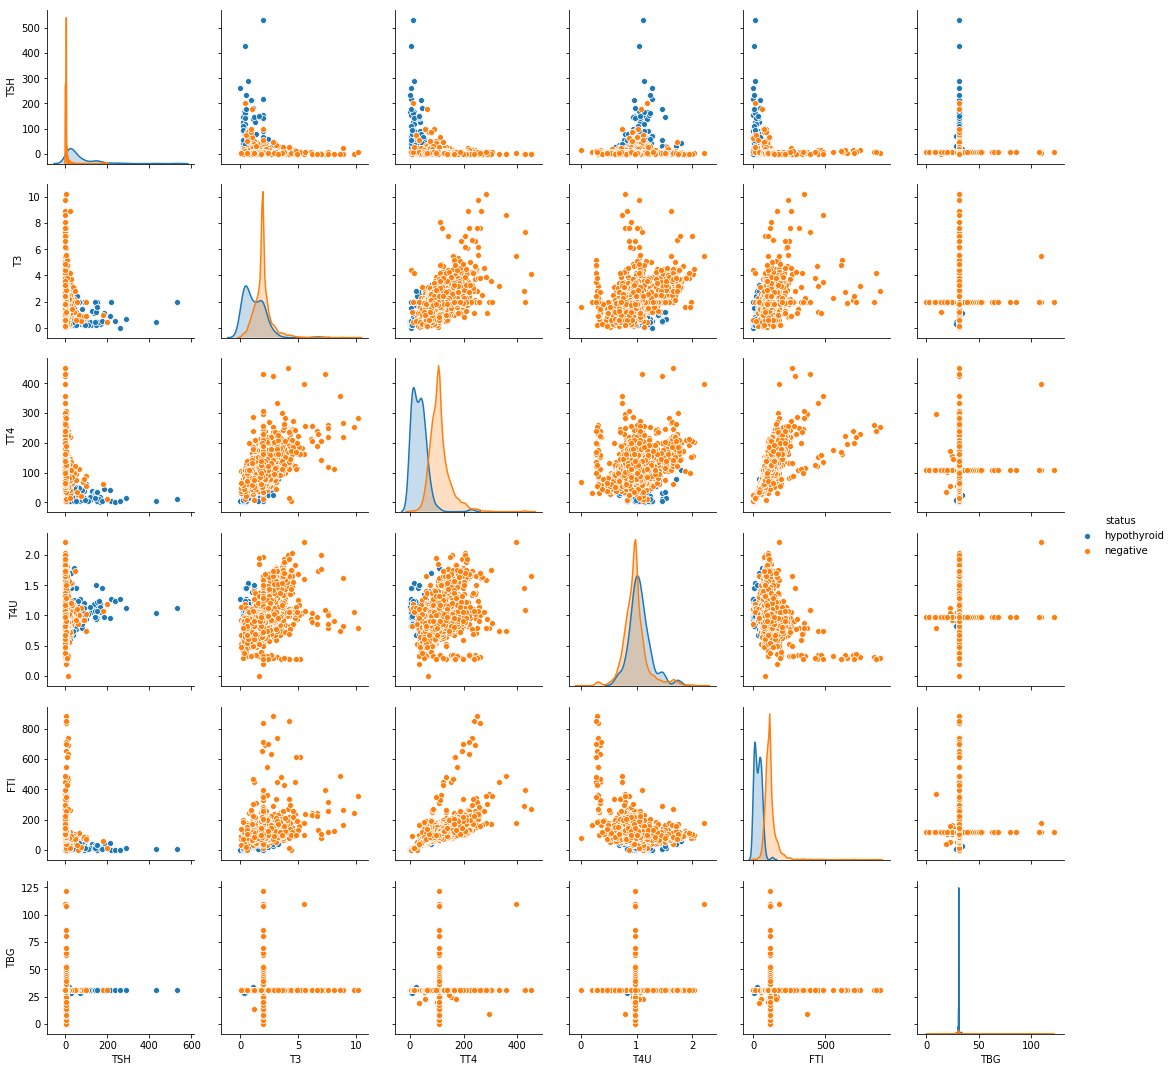

In [31]:
# scatterplot of test results
numerical = ['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

sb.pairplot(hypo, kind = "scatter", diag_kind = "kde", vars = numerical,
            hue = "status")

Hyperthyroidism shows up more in TSH tests, indicating that that test is an important factor influencing it. We also see that linear models will not work well with this data so we can only use them for comparison purposes.

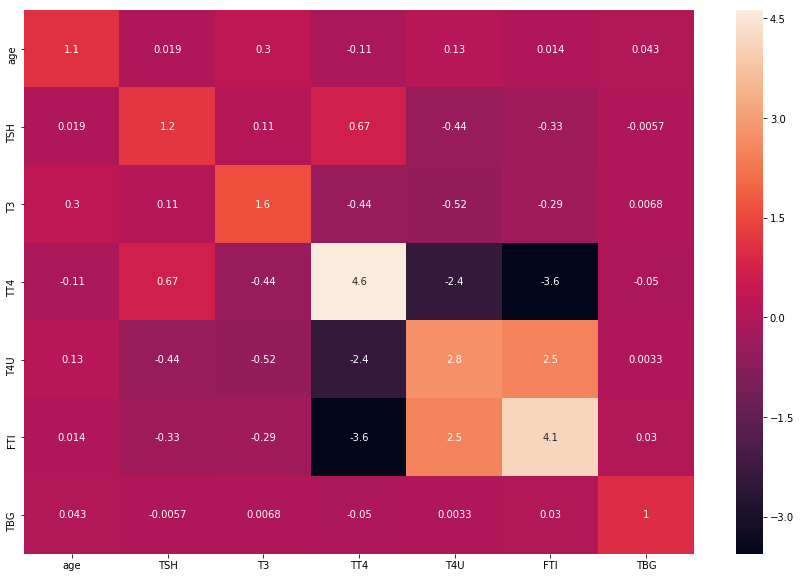

In [32]:
# investigating the correlation between variables
corr = hypo.corr()
vif = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)

# using a heatmap to display the results
plt.figure(figsize = (15, 10))
sb.heatmap(vif, annot = True)

A Variance Inflation Factor (VIF) score of around 5 is problematic. While we don't have any such scores, we do however have two variables, TT4 and FTI that come close. We will drop them and their relevant tests, i.e. TT4_measured and FTI_measured respectively, and see if this data set's multicollinearity will be reduced.

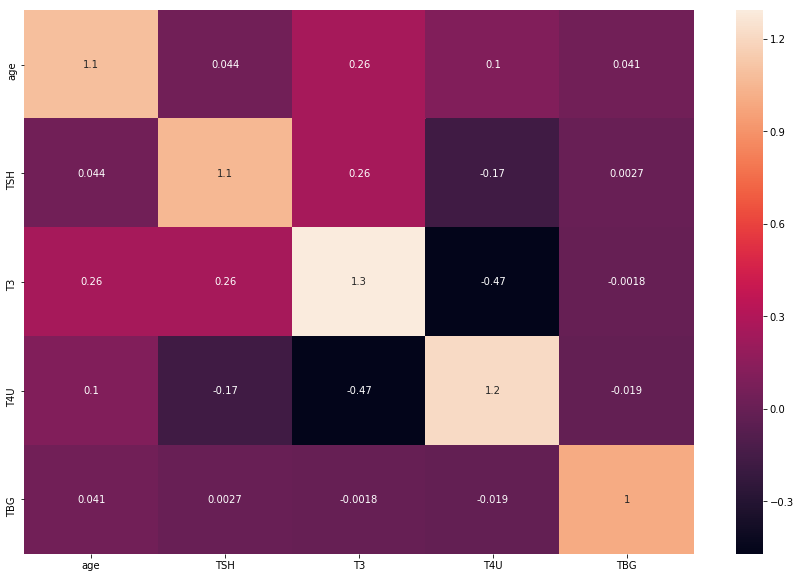

In [33]:
hypo = hypo.drop(columns = ['TT4_measured', 'TT4', 'FTI_measured', 'FTI'], axis = 1)

corr = hypo.corr()
vif = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, 
                   columns = corr.columns)

plt.figure(figsize = (15, 10))
sb.heatmap(vif, annot = True)

This is better. We see that the VIF of T4U has decreased significantly from 2.8 to 1.2. This shows that it had some amount of collinearity with one of the variables that we have dropped.

In [34]:
# dropping columns that are no longer relevant
hypo = hypo.drop(columns = ['TSH_measured', 'T3_measured', 'T4U_measured',
                           'TBG_measured', 'age'], axis = 1)

In [35]:
# saving to csv to use as a checkpoint
hypo.to_csv('hypo_clean.csv', index = False)

# to reload from this checkpoint, uncomment the below line of code
#hypo = pd.read_csv('hypo_clean.csv')

# 4. Modeling

### 4.1 Feature Engineering & Selection

In [36]:
# previewing our data so we can determine which variables to encode
hypo.head()

,status,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,T4U,TBG,age_range
0,hypothyroid,M,f,f,f,f,f,f,f,f,f,f,f,30.0,0.6,1.48,31.07012,G
1,hypothyroid,F,t,f,f,f,f,f,f,f,f,f,f,145.0,1.7,1.13,31.07012,B
2,hypothyroid,M,f,f,f,f,f,f,f,f,f,f,f,0.0,0.2,1.00,31.07012,C
3,hypothyroid,F,f,f,f,f,f,f,f,f,f,f,f,430.0,0.4,1.04,31.07012,C
4,hypothyroid,M,f,f,f,f,f,f,f,f,f,f,f,7.3,1.2,1.28,31.07012,H


In [37]:
from sklearn.preprocessing import LabelEncoder

encode = hypo.columns.to_list()
encode.remove('TSH')
encode.remove('T3')
encode.remove('T4U')
encode.remove('TBG')
encode

['status',
 'sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'thyroid_surgery',
 'query_hypothyroid',
 'query_hyperthyroid',
 'pregnant',
 'sick',
 'tumor',
 'lithium',
 'goitre',
 'age_range']

In [38]:
# encoding
from sklearn.preprocessing import LabelEncoder

# dictionary to store each unique variable class
class_dict = {}

for item in encode:
    encoder = LabelEncoder().fit(hypo[item].unique())
    classed = encoder.classes_
    class_dict[item] = classed
    hypo[item] = encoder.transform(hypo[item].values)

# to decode, use the following structure
class_dict['age_range'][6]

'G'

We have successfully encoded our categorical variables and are now ready to do the actual modelling. While I intend to use all the variables that are now remaining, should I be required to select only a few, these are the variables that I think are most important:
    * age (age_range now)
    * sex
    * TSH

### 4.2 Decision Trees

##### 4.2.1 Random Forest

In [39]:
# splitting our data into features & labels
X = hypo.drop(columns = ['status']).values
y = hypo.status.values

# getting our feature names
features = hypo.columns.to_list()
features.remove('status')

print(X.shape)
print(y.shape)

(3086, 17)
(3086,)


In [40]:
# splitting into training & test data
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 0)

In [41]:
# importing the random forest regressor
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators = 200, min_samples_split = 20,
                              max_depth = 5)

# fitting our model to our training data
forest.fit(X_train, y_train)

# make predictions using our forest
y_pred = forest.predict(X_test)

In [42]:
# compare actual values with predicted values
compare = pd.DataFrame({'Actual' : y_test.flatten(),
                        'Predicted' : y_pred.flatten()})

# previewing our summary statistics
compare.describe()

,Actual,Predicted
count,618.000000,618.000000
mean,0.959547,0.952099
std,0.197179,0.167644
min,0.000000,0.038023
25%,1.000000,0.998964
50%,1.000000,0.999861
75%,1.000000,0.999861
max,1.000000,0.999861


Our model seems to have done a good job at making the predictions as seen by how close the summary statistics of the predicted values are to the those of the actual values. Let us properly and accurately assess the accuracy of the model using the sklearn metrics.

In [43]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.033419567332422496
Mean Squared Error: 0.01587228845527722
Root Mean Squared Error: 0.1259852707870139


The MSE and RMSE values of our random forest are very small meaning our model has done a really good job.

We now want to see what tree number 24 looks like.

/home/karenngugi/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


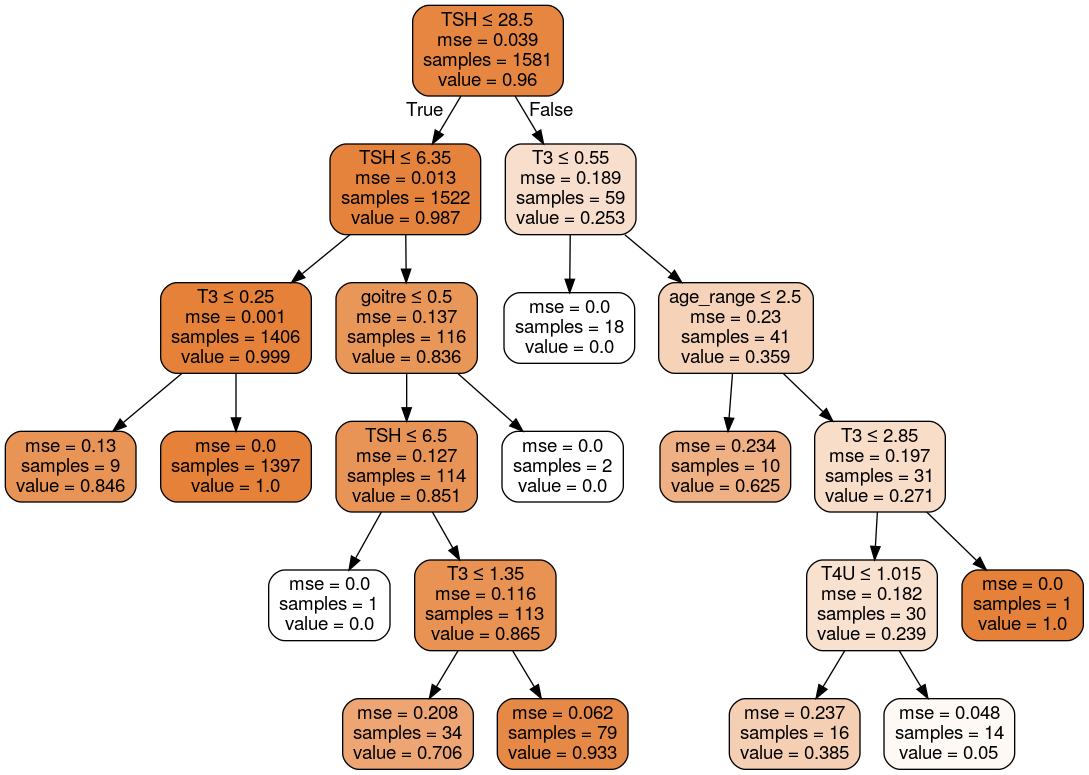

In [44]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

# picks a specific tree from the forest
tree = forest.estimators_[23]

export_graphviz(tree, out_file = dot_data, filled = True, rounded = True,
                special_characters = True, feature_names = features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid.png')
Image(graph.create_png())

In [45]:
# now to get the importance levels of our features
importances = list(tree.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance 
                       in zip(features, importances)]

# sort in descending order
feature_importances = sorted(feature_importances, key = lambda x: x[1], 
                             reverse = True)
feature_importances

[('TSH', 0.84),
 ('T3', 0.09),
 ('goitre', 0.03),
 ('T4U', 0.02),
 ('age_range', 0.02),
 ('sex', 0.0),
 ('on_thyroxine', 0.0),
 ('query_on_thyroxine', 0.0),
 ('on_antithyroid_medication', 0.0),
 ('thyroid_surgery', 0.0),
 ('query_hypothyroid', 0.0),
 ('query_hyperthyroid', 0.0),
 ('pregnant', 0.0),
 ('sick', 0.0),
 ('tumor', 0.0),
 ('lithium', 0.0),
 ('TBG', 0.0)]

As we can see, TSH was the most influential variable on a person's hypothyroid status. It is followed by T3, on_antithyroid_medication, age_range, on_thyroine, and goitre although these subsequent variables have very little impact. It is worth noting that these feature importance levels change with the tree used so just because a certain tree got a specific variable as its most impactful feature does not necessarily mean that the same holds true for all trees in the forest.

##### 4.2.2 Ada Boosting

In [46]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(max_depth = 5)

# training our model on our training data
decision_tree = decision_tree.fit(X_train, y_train)

# making predictions on the test data
decision_y_pred = decision_tree.predict(X_test)

# comparing actual values to predicted values
decision_compare = pd.DataFrame({'Actual' : y_test.flatten(),
                        'Predicted' : decision_y_pred.flatten()})

# previewing our summary statistics
decision_compare.describe()

,Actual,Predicted
count,618.000000,618.000000
mean,0.959547,0.955604
std,0.197179,0.173844
min,0.000000,0.000000
25%,1.000000,0.997319
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [47]:
from sklearn.ensemble import AdaBoostRegressor

# creating our classifier with 200 trees of depth 1
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 1), 
                            n_estimators = 200)

# fitting our model to our training data
ada_reg.fit(X_train, y_train)

# making predictions
ada_reg_y_pred = ada_reg.predict(X_test)

# comparing actual values to predicted values
ada_reg_compare = pd.DataFrame({'Actual' : y_test.flatten(),
                        'Predicted' : ada_reg_y_pred.flatten()})

# previewing our summary statistics
ada_reg_compare.describe()

,Actual,Predicted
count,618.000000,618.000000
mean,0.959547,0.950792
std,0.197179,0.165807
min,0.000000,0.126582
25%,1.000000,0.984094
50%,1.000000,0.984094
75%,1.000000,0.984094
max,1.000000,0.984094


In [48]:
# evaluating accuracy
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ada_reg_y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ada_reg_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ada_reg_y_pred)))

Mean Absolute Error: 0.04119680861507331
Mean Squared Error: 0.021857911070371504
Root Mean Squared Error: 0.14784421216392443


While our scores using this model are low and good, we can see that the RMSE of our Ada-boosted model is slightly larger than that of our random forest. This means that the random forest model is preferential to the Ada-boosted model.

##### 4.2.3 Gradient Boosting

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

# setting different learning rates, so that we can compare the performance of 
# the classifier's performance at different learning rates
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    grad = GradientBoostingRegressor(n_estimators = 200, max_depth = 2,
                                     learning_rate = learning_rate,
                                     random_state = 0)
    grad.fit(X_train, y_train)

    print("Learning rate:", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(grad.score(X_train,
                                                                   y_train)))
    print("Accuracy score (validation): {0:.3f}".format(grad.score(X_test,
                                                                     y_test)))
    print("*******************************************")

Learning rate: 0.05
Accuracy score (training): 0.693
Accuracy score (validation): 0.578
*******************************************
Learning rate: 0.075
Accuracy score (training): 0.718
Accuracy score (validation): 0.582
*******************************************
Learning rate: 0.1
Accuracy score (training): 0.739
Accuracy score (validation): 0.587
*******************************************
Learning rate: 0.25
Accuracy score (training): 0.826
Accuracy score (validation): 0.560
*******************************************
Learning rate: 0.5
Accuracy score (training): 0.884
Accuracy score (validation): 0.488
*******************************************
Learning rate: 0.75
Accuracy score (training): 0.915
Accuracy score (validation): 0.414
*******************************************
Learning rate: 1
Accuracy score (training): 0.919
Accuracy score (validation): 0.375
*******************************************


We can see that a learning rate of 0.1 gives us the best performance when it comes to validating, and good performance when it comes to training so we will use it as our parameter.

In [50]:
# now to use our selected learning rate to model
grad2 = GradientBoostingRegressor(n_estimators = 200, max_depth = 2, 
                                  learning_rate = 0.1, random_state = 0)

# fitting to training data
grad2.fit(X_train, y_train)

# making predictions
grad2_y_pred = grad2.predict(X_test)

# comparing actual values to predicted values
grad2_compare = pd.DataFrame({'Actual' : y_test.flatten(),
                        'Predicted' : grad2_y_pred.flatten()})

# previewing our summary statistics
grad2_compare.describe()

,Actual,Predicted
count,618.000000,618.000000
mean,0.959547,0.953362
std,0.197179,0.166305
min,0.000000,-0.154828
25%,1.000000,0.994667
50%,1.000000,0.999072
75%,1.000000,1.002967
max,1.000000,1.113740


Our model seems to have performed so well there is some level of overfitting. We will now assess its metrics.

In [51]:
# evaluating accuracy
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, grad2_y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, grad2_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, grad2_y_pred)))

Mean Absolute Error: 0.03803702482603944
Mean Squared Error: 0.01601472304672629
Root Mean Squared Error: 0.12654929097678222


Our Gradient-boosted RMSE score is low, indicating that this model is performing really well. While it performs better than the Ada-boosted model, especially thanks to the optimized parameters, it still performs very slightly worse than our random forest model. However, I doubt the difference is statistically significant, and would recommend a combination of random forest and gradient boosting with optimized parameters where possible.

### 4.3 Support Vector Machines

##### 4.3.1 Linear Kernel

In [52]:
# ensuring our features & label still stand
X = hypo.drop(columns = 'status').values
y = hypo['status'].values
print(X.shape)
print(y.shape)

(3086, 17)
(3086,)


In [53]:
# applying Principal Component Analysis (PCA) to reduce the number of variables
# for our data
from sklearn.decomposition import PCA
pca = PCA(n_components = 3).fit(X)
X = pca.transform(X)
X.shape

(3086, 3)

In [54]:
# splitting into training & testing data
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 0)

In [55]:
# importing our SVM model and setting kernel to linear

from sklearn.svm import SVC
linear = SVC(kernel = 'linear')

# fitting to training data
linear.fit(X_train, y_train)

# making predictions
lin_y_pred = linear.predict(X_test)

# assessing the model
from sklearn.metrics import confusion_matrix, accuracy_score

print("Linear kernel score:", accuracy_score(y_test, lin_y_pred))
print("Linear kernel confusion matrix:\n", confusion_matrix(y_test, lin_y_pred))

Linear kernel score: 0.9741100323624595
Linear kernel confusion matrix:
 [[ 13  12]
 [  4 589]]


##### 4.3.2 Polynomial Kernel

In [56]:
# trying it out with a polynomial kernel
poly = SVC(kernel = 'poly', gamma = 'auto')

# training the model
poly.fit(X_train, y_train)

# making prediction
poly_y_pred = poly.predict(X_test)

# assessing the model
print("Polynomial kernel score:", accuracy_score(y_test, poly_y_pred))
print("Polynomial kernel confusion matrix:\n", confusion_matrix(y_test, poly_y_pred))

Polynomial kernel score: 0.9692556634304207
Polynomial kernel confusion matrix:
 [[ 20   5]
 [ 14 579]]


##### 4.3.3 Radial Basis Function (RBF) Kernel

In [57]:
# now doing it with rbf kernel
rbf = SVC(kernel = 'rbf', gamma = 'auto')

# training the model
rbf.fit(X_train, y_train)

# making prediction
rbf_y_pred = rbf.predict(X_test)

# assessing the model
print("RBF kernel score:", accuracy_score(y_test, rbf_y_pred))
print("RBF kernel confusion matrix:\n", confusion_matrix(y_test, rbf_y_pred))

RBF kernel score: 0.9692556634304207
RBF kernel confusion matrix:
 [[ 11  14]
 [  5 588]]


##### 4.3.4 Sigmoid Kernel

In [58]:
# finally doing it with the sigmoid kernel
sig = SVC(kernel = 'sigmoid', gamma = 'auto')

# training the model
sig.fit(X_train, y_train)

# making prediction
sig_y_pred = sig.predict(X_test)

# assessing the model
print("Sigmoid kernel score:", accuracy_score(y_test, sig_y_pred))
print("Sigmoid kernel confusion matrix:\n", confusion_matrix(y_test, sig_y_pred))

Sigmoid kernel score: 0.9255663430420712
Sigmoid kernel confusion matrix:
 [[  2  23]
 [ 23 570]]


As we can see, the linear kernel is the best performing while the sigmoid kernel, although still wuite good, is the worst performing of the 4 SVM kernels used.

# 5. Conclusion & Challenging the Solution

Overall, we see that our models have all performed well. The only problem here is that the data set is very imbalanced and biased. It would have been better to have a dataset that has roughly the same number of male and female patients, and the same for those with hypothyroid and those without. Also, it would have been great to have a data set with fewer missing values. 

Furthermore, the lack of domain knowledge inhibited me from properly attempting to answer the research question. I did not understand what exactly terms like 'on_thyroxine', 'TSH', and so I could not fully investigate the relevant variables.

With that said, I should have done even more exhaustive exploratory data analysis, especially bivariate and multivariate analysis. Finally, I should play around with the parameters of the different models like the degree, maximum depth, number of estimators, and so on so as to find the parameters that best optimize the respective models.